# <center>Python Dataset Analysis 1 by William Chaudoin</center>

### <center>Import and Install necessary Libraries and Packages</center>

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### <center>Load Dataset</center>

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### <center>Data Visualization</center>

## Build a Boxplot using MEDV data

Text(0.5, 1.0, 'Median value of owner-occupied homes')

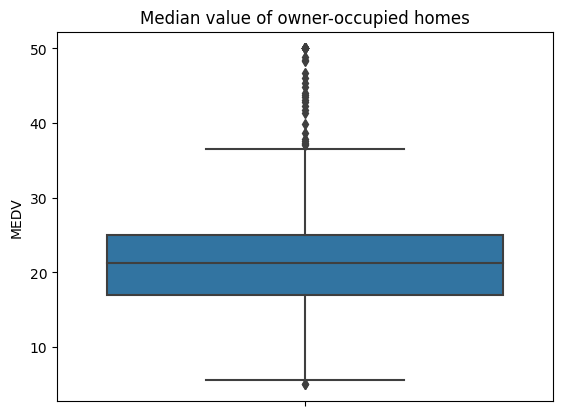

In [5]:
ax1 = sns.boxplot(y = 'MEDV', data = boston_df)
ax1.set_title('Median value of owner-occupied homes')

Description: The above is a boxplot that depicts the median value of owner-occupied homes according to the MEDV variable assigned

## Build a bar plot for the Charles river variable

Text(0.5, 1.0, 'Homes that bound the Charles River')

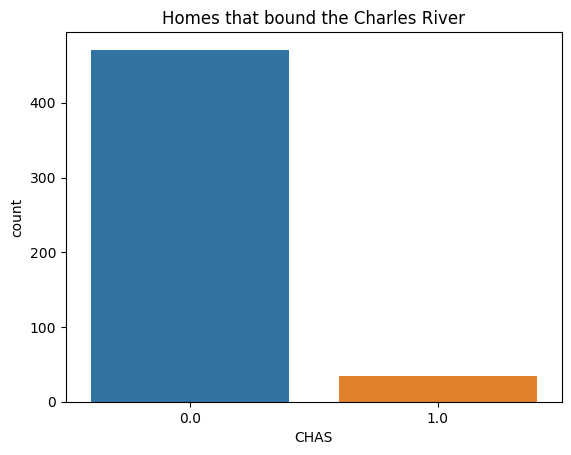

In [7]:
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
ax2.set_title('Homes that bound the Charles River')

Description: The above is a bar plot that depicts the CHAS variable which indicates whether a home bounds the Charles River

## Build a boxplot for the MEDV variable vs the AGE variable. (Group the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'group'] = '70 years and older'

Description: The above segmentates the age variable by the desired 3 groups to create a boxplot that measures age against the median value of owner-occupied homes

Text(0.5, 1.0, 'Median value of owner-occupied homes by Age Group')

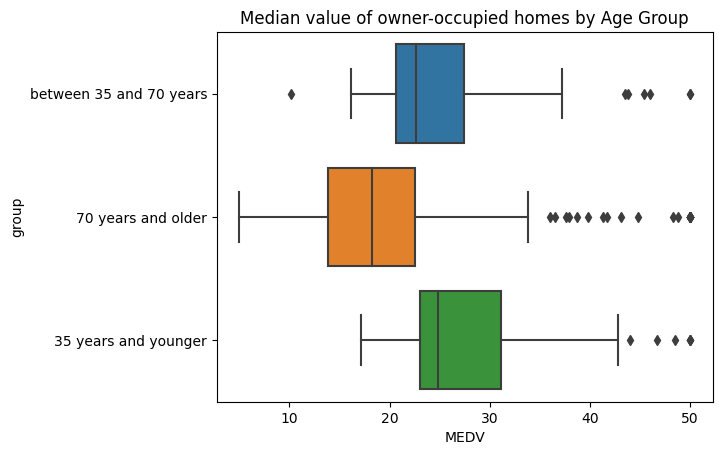

In [9]:
ax3 = sns.boxplot(x = 'MEDV', y = 'group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes by Age Group')

Description: The above is a box plot that compares the median value of owner-occupied homes against the 3 defined age groups

## Build a scatterplot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Text(0.5, 1.0, 'Nitric Oxides Concentrations (parts per 10 million) Proportion of Non-Retail Business Acres per Town.')

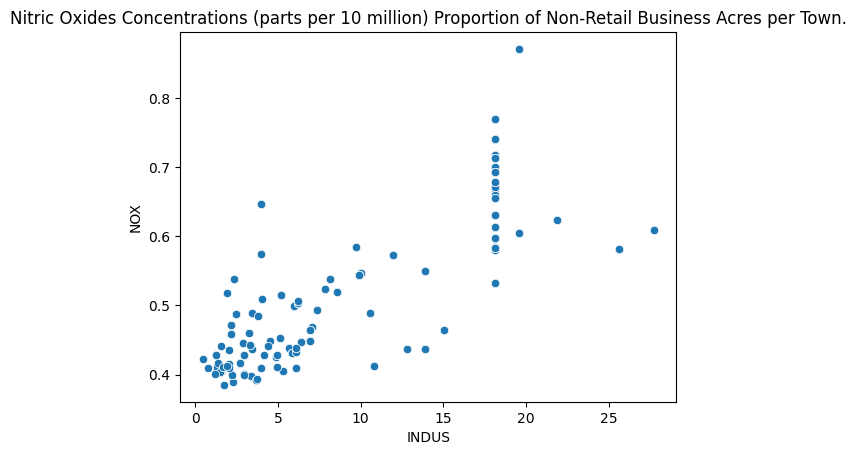

In [10]:
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric Oxides Concentrations (parts per 10 million) Proportion of Non-Retail Business Acres per Town.')

Description: The above is a scatter plot that shows the relationship between Nitric Oxides Concentrations (parts per 10 million) and the Proportion of Non-Retail Business Acres per Town

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil-Teacher Ratio by Town')

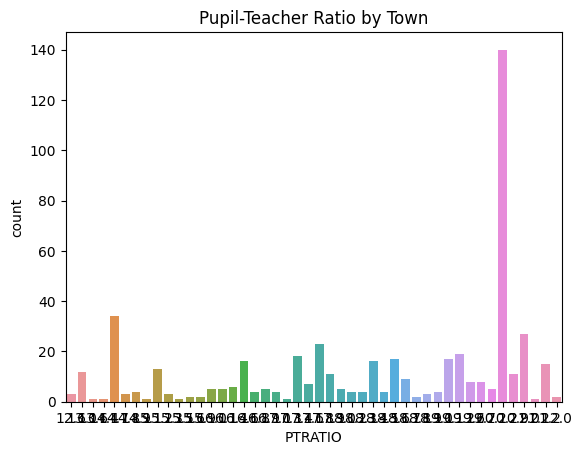

In [11]:
ax5 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax5.set_title('Pupil-Teacher Ratio by Town')

Description: The above is a histogram illustrating the Pupil-Teacher Ratio by Town

### <center>Statistical Tests</center>

## T Test on CHAS varaible

Null Hypothesis: There is no significant difference in median value of houses bounded or not bounded by the Charles River.

Alternative Hypothesis: There is a significant difference in median value of houses bounded or not bounded by the Charles River.

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Answer: The p-value is less than our alpha of .05, as such we reject the Null and confirm there is a significant difference in median value of houses bounded or not bounded by the Charles River. 

## ANOVA on MEDV and AGE

Null Hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

Alternative Hypothesis: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

In [15]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Answer: The p-value is less than our alpha of .05, as such we fail to accept the Null and confirm there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

## Pearson Correlation on NOX and INDUS

Null Hypothesis: There is no corrrelation between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis: There is a corrrelation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

Answer: The p-value is less than our alpha of .05, as such we reject the Null and confirm there is a positive corrrelation between Nitric oxide concentrations and proportion of non-retail business acres per town since the correlation coefficent of .76365 is positive.

## Regression on DIS and MEDV

Goal: To determine what impact an additional weighted distance to the five Boston employment centres is on the median value of owner occupied homes.

In [19]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        15:58:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: For each additional measurement of distance, the median value of owner occupied homes increases by 1.0916.